# Previsão da permissividade dielétrica na frequência de 915 MHz a partir das propriedades físico químicas de 8 diferentes sucos

In [1]:
import numpy as np

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd

import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

###Depois descomentar aqui
from keras.models import Sequential
from keras.layers import Dense

from matplotlib import pyplot as plt

Using TensorFlow backend.


### Leitura  e visualização da base de dados

In [2]:
base = pd.read_excel('ic.xlsx')

In [3]:
base.sample(20)

,T,Acidez,Aw,Umidade,ST,Brix,Cor - L*,Cor - a*,Cor - b*,sig,w1_915,w1_2450,w2_915,w2_2450,e1_915,e1_2450,e2_915,e2_2450
38,90,0.080595,0.993,88.777440,28.001800,11.76,32.700000,-0.783333,-0.423333,12.683333,1.005311,1.005091,5.265066,2.351171,61.90826,60.16880,31.32553,14.67355
99,90,0.640485,0.953,89.983175,10.016825,12.88,42.600000,-1.520000,13.030000,12.153171,0.970395,0.951848,4.228839,1.962878,59.01914,57.50490,26.10140,11.98970
116,80,1.156098,0.906,90.035023,9.964977,26.08,33.180000,-0.260000,-1.450000,5.362861,0.964807,1.186616,1.850816,2.263748,61.27884,60.73280,9.80234,6.57210
94,70,0.632628,0.954,90.070932,9.929068,12.78,43.140000,-1.420000,13.830000,9.695000,0.972601,0.948325,3.449075,1.646802,64.24496,62.46380,20.97458,11.66050
91,50,0.640485,0.953,89.983175,10.016825,12.88,42.600000,-1.520000,13.030000,7.786388,0.963829,0.937601,2.731786,1.486015,67.99030,65.91400,17.99186,12.14730
31,50,0.084709,0.956,88.790259,19.422500,11.56,32.710000,-0.752783,-0.377145,8.008415,0.982527,0.985974,2.993157,1.616580,68.27757,66.06675,21.86165,13.94035
8,40,0.538279,0.959,91.411839,8.588161,8.58,32.593333,-0.633333,5.803333,1.159000,0.976608,1.057319,1.393115,1.166682,71.79364,70.48540,5.85626,8.63710
127,30,0.596655,0.947,92.973276,7.026724,29.61,39.700000,22.790000,16.910000,2.750660,0.980062,0.970798,1.220571,1.217685,75.20026,73.61110,6.34590,10.27230
19,90,0.557757,0.959,91.347034,8.652966,8.68,32.599107,-0.601188,5.858409,2.167000,0.990577,1.265180,1.430307,1.252586,60.59102,59.78150,6.12536,4.88620
130,50,0.602444,0.948,92.991176,7.008824,29.63,39.690000,22.800000,16.900000,3.321969,0.986650,0.978802,1.448467,1.386153,69.75121,68.88360,6.02837,7.30225


### Separação entre variáveis dependentes e independentes

In [4]:
X = base.iloc[:, 0:10].values

#Vamos prever e1_945
y = base['e1_915'].values

In [5]:
X.shape

(160, 10)

In [6]:
y = np.reshape(y, (-1,1))

In [7]:
y.shape

(160, 1)

### Padronização dos dados

In [8]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)


### Separação entre dados de treinamento e dados de teste

In [9]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y,
                                                                  test_size = 0.3,
                                                                  random_state=0)


### Definição da arquitetura da rede neural

In [10]:
model = Sequential()
model.add(Dense(6, input_dim = 10, activation = 'softmax'))
# Prever todas saídas
model.add(Dense(1,))

### Definição da taxa de aprendizado (learning rate)

In [11]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate =0.01)

### Definição da métrica Root Mean Squared Error (RMSE)



In [12]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))


### Importar o backend do tensorflow (eu não sei exatamente porque precisei fazer isso)

In [13]:
from keras import backend

### Cálculo do erro, otimizador e métricas

In [14]:
model.compile(loss = 'mse',
              optimizer=optimizer,
              metrics= ['mae','mse',rmse])


### Resumo de todos hiperparâmetros e arquitetura do modelo 

In [15]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 66        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


### Treinamento do modelo

In [16]:
model.fit(X_treinamento, y_treinamento, 
          epochs=200,
          validation_split=0.2,
          shuffle=True,
          verbose=True)

Train on 89 samples, validate on 23 samples
Epoch 1/200
89/89 [==============================] - 0s 2ms/step - loss: 1.0314 - mae: 0.8823 - mse: 1.0314 - rmse: 0.8823 - val_loss: 0.9923 - val_mae: 0.8551 - val_mse: 0.9923 - val_rmse: 0.8551
Epoch 2/200
89/89 [==============================] - 0s 70us/step - loss: 0.9225 - mae: 0.8383 - mse: 0.9225 - rmse: 0.8383 - val_loss: 0.9217 - val_mae: 0.8239 - val_mse: 0.9217 - val_rmse: 0.8239
Epoch 3/200
89/89 [==============================] - 0s 78us/step - loss: 0.8611 - mae: 0.8067 - mse: 0.8611 - rmse: 0.8067 - val_loss: 0.8635 - val_mae: 0.7979 - val_mse: 0.8635 - val_rmse: 0.7979
Epoch 4/200
89/89 [==============================] - 0s 107us/step - loss: 0.8096 - mae: 0.7809 - mse: 0.8096 - rmse: 0.7809 - val_loss: 0.8111 - val_mae: 0.7727 - val_mse: 0.8111 - val_rmse: 0.7727
Epoch 5/200
89/89 [==============================] - 0s 101us/step - loss: 0.7613 - mae: 0.7555 - mse: 0.7613 - rmse: 0.7555 - val_loss: 0.7601 - val_mae: 0.7489 - 

Epoch 42/200
89/89 [==============================] - 0s 70us/step - loss: 0.0416 - mae: 0.1566 - mse: 0.0416 - rmse: 0.1566 - val_loss: 0.0388 - val_mae: 0.1609 - val_mse: 0.0388 - val_rmse: 0.1609
Epoch 43/200
89/89 [==============================] - 0s 65us/step - loss: 0.0402 - mae: 0.1540 - mse: 0.0402 - rmse: 0.1540 - val_loss: 0.0366 - val_mae: 0.1575 - val_mse: 0.0366 - val_rmse: 0.1575
Epoch 44/200
89/89 [==============================] - 0s 68us/step - loss: 0.0392 - mae: 0.1541 - mse: 0.0392 - rmse: 0.1541 - val_loss: 0.0351 - val_mae: 0.1558 - val_mse: 0.0351 - val_rmse: 0.1558
Epoch 45/200
89/89 [==============================] - 0s 74us/step - loss: 0.0359 - mae: 0.1444 - mse: 0.0359 - rmse: 0.1444 - val_loss: 0.0341 - val_mae: 0.1564 - val_mse: 0.0341 - val_rmse: 0.1564
Epoch 46/200
89/89 [==============================] - 0s 64us/step - loss: 0.0347 - mae: 0.1430 - mse: 0.0347 - rmse: 0.1430 - val_loss: 0.0363 - val_mae: 0.1586 - val_mse: 0.0363 - val_rmse: 0.1586
Epoch

Epoch 124/200
89/89 [==============================] - 0s 70us/step - loss: 0.0079 - mae: 0.0715 - mse: 0.0079 - rmse: 0.0715 - val_loss: 0.0136 - val_mae: 0.0879 - val_mse: 0.0136 - val_rmse: 0.0879
Epoch 125/200
89/89 [==============================] - 0s 92us/step - loss: 0.0102 - mae: 0.0839 - mse: 0.0102 - rmse: 0.0839 - val_loss: 0.0175 - val_mae: 0.1061 - val_mse: 0.0175 - val_rmse: 0.1061
Epoch 126/200
89/89 [==============================] - 0s 69us/step - loss: 0.0081 - mae: 0.0702 - mse: 0.0081 - rmse: 0.0702 - val_loss: 0.0133 - val_mae: 0.0904 - val_mse: 0.0133 - val_rmse: 0.0904
Epoch 127/200
89/89 [==============================] - 0s 65us/step - loss: 0.0071 - mae: 0.0696 - mse: 0.0071 - rmse: 0.0696 - val_loss: 0.0146 - val_mae: 0.0949 - val_mse: 0.0146 - val_rmse: 0.0949
Epoch 128/200
89/89 [==============================] - 0s 74us/step - loss: 0.0086 - mae: 0.0764 - mse: 0.0086 - rmse: 0.0764 - val_loss: 0.0209 - val_mae: 0.1141 - val_mse: 0.0209 - val_rmse: 0.1141


Epoch 165/200
89/89 [==============================] - 0s 77us/step - loss: 0.0050 - mae: 0.0569 - mse: 0.0050 - rmse: 0.0569 - val_loss: 0.0127 - val_mae: 0.0862 - val_mse: 0.0127 - val_rmse: 0.0862
Epoch 166/200
89/89 [==============================] - 0s 60us/step - loss: 0.0062 - mae: 0.0647 - mse: 0.0062 - rmse: 0.0647 - val_loss: 0.0217 - val_mae: 0.1168 - val_mse: 0.0217 - val_rmse: 0.1168
Epoch 167/200
89/89 [==============================] - 0s 61us/step - loss: 0.0077 - mae: 0.0688 - mse: 0.0077 - rmse: 0.0688 - val_loss: 0.0114 - val_mae: 0.0828 - val_mse: 0.0114 - val_rmse: 0.0828
Epoch 168/200
89/89 [==============================] - 0s 75us/step - loss: 0.0054 - mae: 0.0589 - mse: 0.0054 - rmse: 0.0589 - val_loss: 0.0115 - val_mae: 0.0807 - val_mse: 0.0115 - val_rmse: 0.0807
Epoch 169/200
89/89 [==============================] - 0s 75us/step - loss: 0.0050 - mae: 0.0591 - mse: 0.0050 - rmse: 0.0591 - val_loss: 0.0173 - val_mae: 0.1012 - val_mse: 0.0173 - val_rmse: 0.1012


### Previsões:

Text(0, 0.5, 'Predictions ')

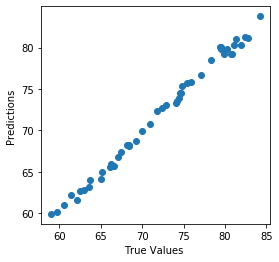

In [17]:
previsoes = model.predict(X_teste)

test_predictions = model.predict(X_teste)

a = plt.axes(aspect='equal')
plt.scatter(scaler_y.inverse_transform(y_teste), scaler_y.inverse_transform(test_predictions))
plt.xlabel('True Values ')
plt.ylabel('Predictions ')


### Coeficiente de determinação

In [18]:
from sklearn.metrics import r2_score

acuracia_teste = r2_score(scaler_y.inverse_transform(y_teste),
                          scaler_y.inverse_transform(test_predictions))

previsao_todas = scaler_y.inverse_transform(model.predict(X_teste))
y_teste_real = scaler_y.inverse_transform(y_teste)

acuracia_teste

0.9914330061583636